### Model OLd - Models [Person,Dog]

In [ ]:
pip install ImageAI==2.1.6 tensorflow==2.7.0rc0 #--quiet

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from imageai.Detection import ObjectDetection
import urllib.request
from IPython.display import Image

In [ ]:
urllib.request.urlretrieve('https://gitlab.com/andreass.bayu/imageai-repo/-/raw/master/resnet50_coco_best_v2.1.0.h5','modelresnet1.h5')
urllib.request.urlretrieve('https://gitlab.com/andreass.bayu/imageai-repo/-/raw/master/yolo-tiny.h5','modelyolotiny1.h5')
urllib.request.urlretrieve('https://gitlab.com/andreass.bayu/imageai-repo/-/raw/master/yolo.h5','modelyolo1.h5')

('modelyolo1.h5', <http.client.HTTPMessage at 0x7f8d681836d0>)

In [ ]:
def imageDetection(model_path,input_path,output_path,modelType):
    detector = ObjectDetection()
    if modelType == 'retina':
        detector.setModelTypeAsRetinaNet()
        print('Retina Type Result \n')
    elif modelType == 'yolo':
        detector.setModelTypeAsYOLOv3()
        print('YOLOv3 Type Result \n')
    elif modelType == 'tinyyolo':
        detector.setModelTypeAsTinyYOLOv3()
        print('TiniYOLOv3 Type Result \n')
        
    detector.setModelPath(model_path)
    detector.loadModel()
    
    detection = detector.detectObjectsFromImage(input_image=input_path, output_image_path=output_path)
    
    for eachItem in detection:
        print(eachItem["name"] , " : ", eachItem["percentage_probability"])
    
    return display(Image(filename=output_path)) 

Retina Type Result 

person  :  89.38376307487488


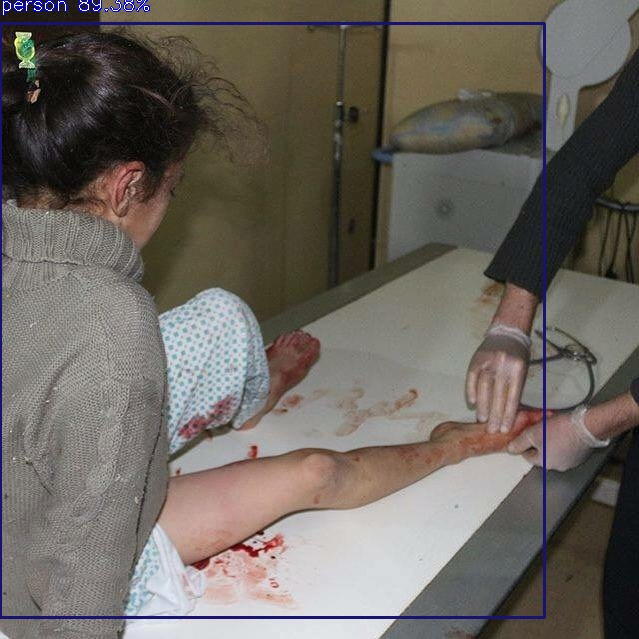

In [ ]:
imageDetection('./modelresnet1.h5','/content/drive/MyDrive/Colab Notebooks/datasets/SIH/images/5:1 datasets/Human_Damage/02_0099.png','/content/drive/MyDrive/Colab Notebooks/datasets/SIH/images/5:1 datasets/1.jpg',"retina")

YOLOv3 Type Result 

person  :  64.1394555568695
person  :  99.6936023235321


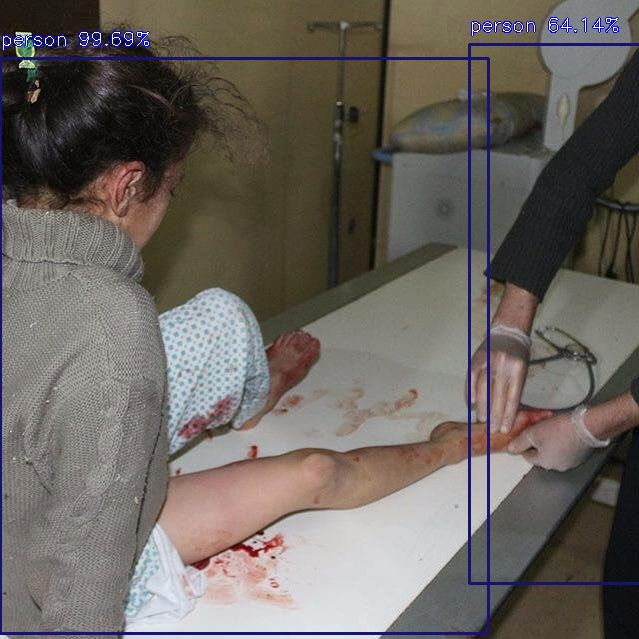

In [ ]:
imageDetection('./modelyolo1.h5','/content/drive/MyDrive/Colab Notebooks/datasets/SIH/images/5:1 datasets/Human_Damage/02_0099.png','/content/drive/MyDrive/Colab Notebooks/datasets/SIH/images/5:1 datasets/1.jpg','yolo')

### Custom Datasets

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 11142, done.
remote: Total 11142 (delta 0), reused 0 (delta 0), pack-reused 11142
Receiving objects: 100% (11142/11142), 11.09 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (7708/7708), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt --quiet # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 4.3 MB/s 
Setup complete. Using torch 1.10.0+cu111 CPU


In [3]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow --quiet
from roboflow import Roboflow 
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

     |████████████████████████████████| 138 kB 6.6 MB/s 
     |████████████████████████████████| 178 kB 40.6 MB/s 
     |████████████████████████████████| 1.1 MB 39.4 MB/s 
     |████████████████████████████████| 145 kB 56.8 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [ ]:
%cd /content/yolov5
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")
%cat {dataset.location}/data.yaml

/content/yolov5
cat: {dataset.location}/data.yaml: No such file or directory


In [ ]:
#model config #10 Conv layers
%cat /content/yolov5/models/yolov5s.yaml

In [8]:
#customize iPython writefile so we can write variables -magic functions helps to interact with the system

from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

#### writting custom or change accordinliy to user

In [21]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

UsageError: %%writetemplate is a cell magic, but the cell body is empty. Did you mean the line magic %writetemplate (single %)?


In [ ]:
# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%%time 
%cd /content/yolov5/

#add number of images and epochs/batch is 16 & 100
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

#### Evaluation

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
Image(filename='jpg image', width=900)

In [ ]:
#interfrence and saving

%ls runs/
%ls runs/train/yolov5s_results/weights #get 2 models best and last models

In [ ]:
#saving best models
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive/